# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [2]:
def find_sum(a: int, d: int, N: int) -> float:
    return sum([1 / (a + i * d) for i in range(0, N)])

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [44]:
def check_palindrome(num):
    digits = []

    while num:
        digits.append(num % 10)
        num //= 10

    num_of_digits = len(digits)
    for i in range(0, num_of_digits // 2):
        if digits[i] != digits[num_of_digits - i - 1]:
            return False

    return True

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [4]:
def find_palindromes(N):
    palindromes = []
    num = 42

    while len(palindromes) < N:
        if (check_palindrome(num)):
            palindromes.append(num)
        num += 1

    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [5]:
from random import randint

def find_median(a, b, c):
    if b <= a <= c or c <= a <= b:
        return a

    if a <= b <= c or c <= b <= a:
        return b

    if a <= c <= b or b <= c <= a:
        return c

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    print(a, b, c, '\tMedian:', find_median(a, b, c))

-56 38 39 	Median: 38
63 -9 59 	Median: 59
35 5 88 	Median: 35
94 48 -46 	Median: 48
46 84 -76 	Median: 46
-63 84 -31 	Median: -31
11 57 22 	Median: 22
-58 -52 -65 	Median: -58
63 71 -71 	Median: 63
-53 -75 -11 	Median: -53


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [37]:
my_array = np.random.normal(size=12)
my_array *= (15 / np.sum(my_array))

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')z

Length: 12
Sum of elements: 15.000000000000002


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [9]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum(np.power(a - b, 2)))

def calculate_chebyshev(a, b):
    return np.max(np.abs(a - b))

def calculate_cosine(a, b):
    def helper(x):
        return np.sqrt(np.sum(np.power(x, 2)))

    return 1 - (np.dot(a, b) / (helper(a) * helper(b)))

In [17]:
# in task wasn't specified which numbers needed, so it's integers -1, 0, 1
a = np.random.randint(-1, 1, 5)
b = np.random.randint(-1, 1, 5)
print(f'First array: {a}\nSecond array: {b}')
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

First array: [-1 -1 -1  0  0]
Second array: [-1  0 -1  0 -1]
Manhattan distance: 2
Euclidean distance: 1.4142135623730951
Chebyshev distance: 1
Cosine distance: 0.33333333333333326


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [18]:
def transform(arr):
    target_min = -6
    target_max = 10

    scaling_factor = (target_max - target_min) / (arr.max() - arr.min())
    shift = target_min - (scaling_factor * arr.min())

    return arr * scaling_factor + shift

In [39]:
my_array = np.random.randint(low=-20, high=20, size=42)
print(f'Initial array:\n{my_array}\n')
my_array = transform(my_array)
print(f'Transformed array:\n{my_array}\n')
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')

Initial array:
[ -9  18  19 -19 -16  -6  15 -20   8 -14  13  -5   3  -6 -11  18 -15 -17
  -9 -20 -10 -10  19  18  16  15 -12 -11 -11   7  10 -10  -8 -19 -16  -1
 -10 -13 -15 -17 -20  10]

Transformed array:
[-1.48717949  9.58974359 10.         -5.58974359 -4.35897436 -0.25641026
  8.35897436 -6.          5.48717949 -3.53846154  7.53846154  0.15384615
  3.43589744 -0.25641026 -2.30769231  9.58974359 -3.94871795 -4.76923077
 -1.48717949 -6.         -1.8974359  -1.8974359  10.          9.58974359
  8.76923077  8.35897436 -2.71794872 -2.30769231 -2.30769231  5.07692308
  6.30769231 -1.8974359  -1.07692308 -5.58974359 -4.35897436  1.79487179
 -1.8974359  -3.12820513 -3.94871795 -4.76923077 -6.          6.30769231]

Min: -6.0
Max: 10.0


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [40]:
my_array = np.random.randint(-12, 5, size=(10, 3))
min_elem = my_array.min()
selected_column = my_array[:, np.argwhere(my_array == min_elem)[0, 1]]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'min elem: {min_elem}')
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[ -8  -9  -1]
 [-10  -9 -11]
 [ -3 -10 -10]
 [ -2   0 -12]
 [  0 -12  -4]
 [ -1  -2  -1]
 [  0   1   3]
 [ -3   3   1]
 [ -6  -1  -3]
 [ -2   1   1]]
min elem: -12
Selected column: [ -1 -11 -10 -12  -4  -1   3   1  -3   1]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [44]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan        nan 0.23147963 0.79915413 0.11129322 0.98213681
 0.58221587 0.52857411 0.90092296        nan]


In [45]:
def replace_missing(arr):
    median = np.nanmedian(arr)
    arr[np.isnan(arr)] = median
    return arr

In [46]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.58221587 0.58221587 0.23147963 0.79915413 0.11129322 0.98213681
 0.58221587 0.52857411 0.90092296 0.58221587]


**Answer:** For this task, we will use the median to replace the missing values. The median is a good choice because it provides a measure of central tendency that best represents the data distribution for a small dataset.

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [25]:
def stats_channel(X):
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [26]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-2., -2., -1.]), array([5.49240559, 5.23495078, 5.49502681]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [52]:
def get_unique_values(X):
    # doesnt work
    return np.unique(X.reshape((-1, X.shape[2])), axis=0)

In [ ]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [103]:
dataset =  sns.load_dataset('titanic')
dataset.head(6)

FileNotFoundError: ignored

**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [89]:
print(f'1. Missing values in columns: {dataset.isnull().sum()}\n\n')
print("There are missing values in age, deck, and embark_town columns.")

1. Missing values in columns: survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


There are missing values in age, deck, and embark_town columns.


In [90]:
print(f"2. The percentage of survived passengers: {dataset['survived'].mean() * 100}\n\n")

2. The percentage of survived passengers: 38.38383838383838




In [91]:
print(f"3. There were more male passangers:\n{dataset['sex'].value_counts()}")

3. There were more male passangers:
male      577
female    314
Name: sex, dtype: int64


In [92]:
print(f"4. The least popular port of embarkation: {dataset['embarked'].value_counts().idxmin()}")

4. The least popular port of embarkation: Q


In [93]:
print(f"5. There were {dataset['pclass'].nunique()} passenger classes")

5. There were 3 passenger classes


In [94]:
print(f"Overall average ticket fare: {dataset['fare'].mean()}")
print(f"For every passenger class: {dataset.groupby('pclass')['fare'].mean()}")

Overall average ticket fare: 32.204207968574636
For every passenger class: pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

In [95]:
min_age = dataset['age'].min()
max_age = dataset['age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 0.42
Maximum age: 80.0


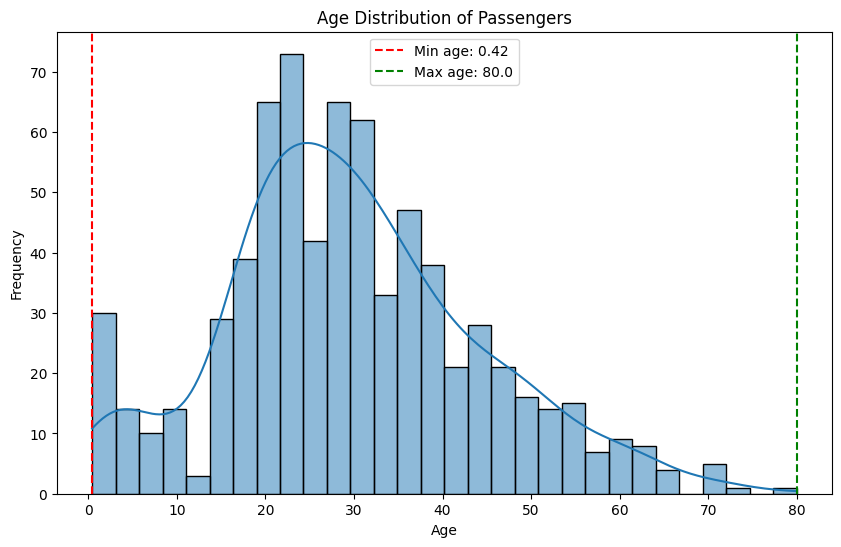

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'], kde=True, bins=30)
plt.axvline(min_age, color='r', linestyle='--', label=f"Min age: {min_age}")
plt.axvline(max_age, color='g', linestyle='--', label=f"Max age: {max_age}")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.title("Age Distribution of Passengers")
plt.show()

In [97]:
median_age = dataset['age'].median()
median_age_male = dataset[dataset['sex'] == 'male']['age'].median()
median_age_female = dataset[dataset['sex'] == 'female']['age'].median()

print(f"Median age: {median_age}")
print(f"Median age among males: {median_age_male}")
print(f"Median age among females: {median_age_female}")

Median age: 28.0
Median age among males: 29.0
Median age among females: 27.0


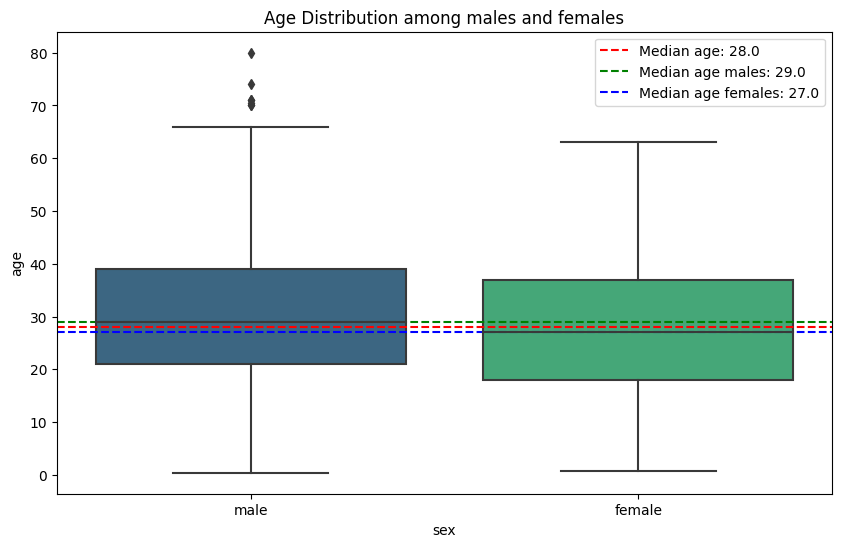

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=dataset, palette='viridis')
plt.axhline(median_age, color='r', linestyle='--', label=f"Median age: {median_age}")
plt.axhline(median_age_male, color='g', linestyle='--', label=f"Median age males: {median_age_male}")
plt.axhline(median_age_female, color='b', linestyle='--', label=f"Median age females: {median_age_female}")
plt.xlabel("sex")
plt.ylabel("age")
plt.legend()
plt.title("Age Distribution among males and females")
plt.show()

Conclusions:
- The minimum age of passengers is 0.42 years, and the maximum age is 80 years.
- The overall median age is 28 years. Among males, the median age is 29 years, and among females, the median age is 27 years.
- The age distribution plot shows that the majority of passengers were in their twenties and thirties.
- The box plot reveals that there is a slight difference in age distribution between males and females, with males being slightly older on average. However, both genders have similar interquartile ranges in their age distributions.


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [100]:
import re

def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

dataset["title"] = dataset["name"].apply(extract_title)

KeyError: ignored

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



In [ ]:
## You code here

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [ ]:
## You code here

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [ ]:
## You code here